In this notebook I analyze the computer performance (level 1, 3, 5, and 7) against humans. 

In [37]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix

First, I look on rounds the smallest unit in which a winner can be determined. 

In [38]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_0') or f.startswith('human_computer1_1')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
#second computer implementation
list_input_files2=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer3_0') and os.path.isfile(os.path.join(myPath, f))]
list_input_files2.sort()

In [39]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  30.   0.   1.]
 [  2.  36.   9.   0.  32.   0.   1.]
 [  3.  78.  24.   0.  31.   1.   1.]
 [  4.  11.  49.   1.  24.   0.   1.]
 [  5.   9.  22.   1.  26.   0.   1.]
 [  6.  13.  28.   1.  78.   1.   1.]
 [  7.   9.  19.   1.  41.   1.   1.]
 [  8.  10.  30.   1.  33.   1.   1.]
 [  9.  32.   8.   0.  31.   1.   1.]
 [ 10.  20.  24.   1.  41.   1.   1.]
 [ 11.  22.  34.   1.  34.   0.   1.]
 [ 12.  17.  41.   1.  34.   0.   1.]
 [ 13.  27.  29.   1.  27.   0.   1.]
 [ 14.  46.  15.   0.  31.   0.   1.]
 [ 15.  11.  23.   1.  32.   0.   1.]
 [ 16.  12.  36.   1.  24.   0.   1.]
 [ 17.  16.  22.   1.  35.   1.   1.]
 [ 18.  36.   4.   0.  36.   1.   1.]
 [ 19.  19.  28.   1.  24.   1.   1.]
 [ 20.  18.  32.   1.  36.   1.   1.]
 [ 21.  26.  13.   0.  36.   1.   1.]
 [ 22.  10.  55.   1.  27.   1.   1.]
 [ 23.  28.  41.   1.  36.   1.   1.]
 [ 24.  20.  65.   1.  24.   1.   1.]
 [ 25.  29.  39.   1.  26.   1.   1.]
 [ 26.  35.  45.   1.  28.   1.   1.]
 [ 27.  24. 

In [40]:
res2=np.zeros((7,len(list_input_files2)))
deltahuman2=0
deltacomputer2=0
#list of results, currect ones need to 
listf2=[]
for i in range(len(list_input_files2)):
    file=np.loadtxt(list_input_files2[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files2[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf2.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf2.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf2.append(finfile)
    res2[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res2[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res2[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res2[5,i]=file[0,0]
    #last player
    res2[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res2[1:3,i]=file[49:51,0]
    else:
        res2[1,i]=file[50,0]
        res2[2,i]=file[49,0]
    if res2[1,i]<res2[2,i]:
        #human winner mark
        res2[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman2+=(res2[2,i]-res2[1,i])
    else:
        deltacomputer2+=(res2[1,i]-res2[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res2.T)        
#print number of elements in list
print(len(listf2))

[[  1.  10.  41.   1.  28.   0.   1.]
 [  2.  28. 130.   1.  21.   0.   0.]
 [  3.  15.  16.   1.  28.   0.   1.]
 [  4.  18.  39.   1.  24.   0.   1.]
 [  5.  42.  28.   0.  27.   0.   0.]
 [  6.  20.  53.   1.  25.   1.   1.]
 [  7.  25.  37.   1.  24.   0.   1.]
 [  8.  21.  68.   1.  25.   1.   1.]
 [  9.  58. 150.   1.  22.   1.   0.]
 [ 10.  46.  32.   0.  22.   1.   0.]
 [ 11.  38.  55.   1.  25.   1.   1.]
 [ 12.  48.  35.   0.  24.   1.   0.]
 [ 13.  24.  39.   1.  28.   0.   1.]
 [ 14.  43. 126.   1.  21.   0.   0.]
 [ 15.  37. 124.   1.  24.   1.   0.]
 [ 16.  17. 132.   1.  26.   1.   0.]
 [ 17.  39.  96.   1.  21.   0.   0.]
 [ 18.  41.  96.   1.  20.   1.   0.]
 [ 19.  32.  76.   1.  23.   1.   1.]
 [ 20.  43. 120.   1.  20.   1.   0.]
 [ 21.  48. 134.   1.  21.   0.   0.]
 [ 22.  31.  32.   1.  38.   0.   1.]
 [ 23.  18.  39.   1.  29.   1.   1.]
 [ 24.  27.  98.   1.  25.   0.   0.]]
24


In [41]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [42]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 3565)


In [43]:
print("with computer level 1")
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")
print("with computer level 3")
print(f"the human won {int(sum(res2[3]))} times of {res2.shape[1]} rounds")
print(f"the human average is {round(np.mean(res2[1]),3)} points")
print(f"the computer average is {round(np.mean(res2[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res2[2]-res2[1]),3)} points")
print(f"the human wins to {round(np.mean(res2[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman2/sum(res2[3]),3)} points")
print(f"computer average adventage {round(deltacomputer2/(res2.shape[1]-sum(res2[3])),3)} points")

with computer level 1
the human won 89 times of 112 rounds
the human average is 27.562 points
the computer average is 35.268 points
the human average adventage is  7.705 points
the human wins to 79.5 %
human average adventage 18.427 points
computer average adventage 33.783 points
with computer level 3
the human won 21 times of 24 rounds
the human average is 32.042 points
the computer average is 74.833 points
the human average adventage is  42.792 points
the human wins to 87.5 %
human average adventage 50.857 points
computer average adventage 13.667 points


It seems that level 3 is not an improvement compared to level 1. 

In [44]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [45]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

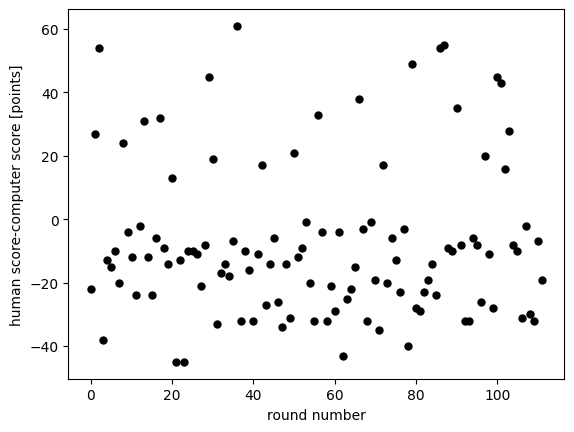

In [46]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

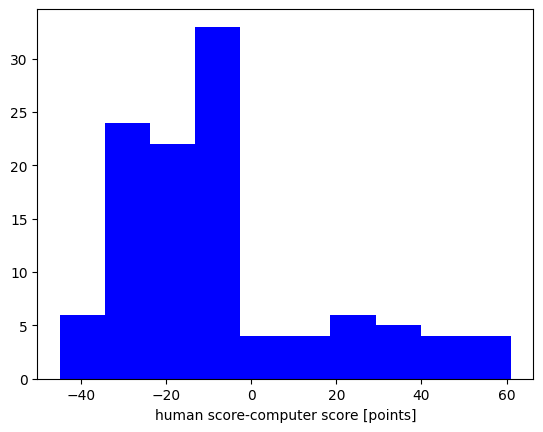

In [47]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

Now I look on full games in level 1, 3 and 5, 7. That is more important because since games is fianl unit of skyjo.

In [48]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files_l1=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l1.sort()
print(list_input_files_l1)

list_input_files_l3=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer3_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l3.sort()
print(list_input_files_l3)

list_input_files_l5=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l5.sort()
print(list_input_files_l5)

list_input_files_l7=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer7_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l7.sort()
print(list_input_files_l7)

['human_computer1_g001.txt', 'human_computer1_g002.txt', 'human_computer1_g003.txt', 'human_computer1_g004.txt', 'human_computer1_g005.txt', 'human_computer1_g006.txt', 'human_computer1_g007.txt', 'human_computer1_g008.txt', 'human_computer1_g009.txt', 'human_computer1_g010.txt', 'human_computer1_g011.txt', 'human_computer1_g012.txt', 'human_computer1_g013.txt', 'human_computer1_g014.txt', 'human_computer1_g015.txt', 'human_computer1_g016.txt', 'human_computer1_g017.txt', 'human_computer1_g018.txt', 'human_computer1_g019.txt', 'human_computer1_g020.txt', 'human_computer1_g021.txt', 'human_computer1_g022.txt', 'human_computer1_g023.txt', 'human_computer1_g024.txt', 'human_computer1_g025.txt', 'human_computer1_g026.txt', 'human_computer1_g027.txt', 'human_computer1_g028.txt', 'human_computer1_g029.txt', 'human_computer1_g030.txt', 'human_computer1_g031.txt', 'human_computer1_g032.txt', 'human_computer1_g033.txt']
['human_computer3_g001.txt', 'human_computer3_g002.txt', 'human_computer3_g

In [49]:
def get_game_stat(file_list,int2):
    resl1=np.zeros((7,len(file_list)))
    deltahuman=0
    deltacomputer=0
    #list of results, currect ones need to 
    for i in range(len(file_list)):
        finfile=np.loadtxt(file_list[i])   
        #get previous also to check that it is doe snot include also old input
        resl1[0,i]=i+1
        #number of turns 
        resl1[4,i]=finfile.shape[1]
        #number of rounds
        resl1[5,i]=finfile[51,finfile.shape[1]-1]+1
        #get scores of all games added together
        scores=np.zeros((2,int(resl1[5,i])))
        for j in range(finfile.shape[1]):
            if finfile[0,j]==0:
                scores[0:2,int(finfile[51,j])]=finfile[49:51,j]
            else:
                scores[0,int(finfile[51,j])]=finfile[50,j]
                scores[1,int(finfile[51,j])]=finfile[49,j]           
        #always player 0, human first 
        resl1[1,i]=sum(scores[0,:])
        resl1[2,i]=sum(scores[1,:])
                    
        if finfile[0,0]==0:
            #human winner mark
            resl1[3,i]=finfile[52,0]
        else:
            resl1[3,i]=finfile[53,0]
        resl1[6,:]=int2     
    return resl1       

In [50]:
resl1=get_game_stat(list_input_files_l1,1)
print("human against computer level 1")
print(f"the human won {int(sum(resl1[3]))} times of {resl1.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl1[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl1[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl1[2]-resl1[1]),3)} points")
print(f"the human wins to {round(np.mean(resl1[3]*100),1)} %")
print("")
resl3=get_game_stat(list_input_files_l3,3)
print("human against computer level 3")
print(f"the human won {int(sum(resl3[3]))} times of {resl3.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl3[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl3[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl3[2]-resl3[1]),3)} points")
print(f"the human wins to {round(np.mean(resl3[3]*100),1)} %")
print("")
resl5=get_game_stat(list_input_files_l5,5)
print("human against computer level 5")
print(f"the human won {int(sum(resl5[3]))} times of {resl5.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl5[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl5[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl5[2]-resl5[1]),3)} points")
print(f"the human wins to {round(np.mean(resl5[3]*100),1)} %")
print(" ")
resl7=get_game_stat(list_input_files_l7,7)
print("human against computer level 7")
print(f"the human won {int(sum(resl7[3]))} times of {resl7.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl7[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl7[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl7[2]-resl7[1]),3)} points")
print(f"the human wins to {round(np.mean(resl7[3]*100),1)} %")

human against computer level 1
the human won 25 times of 33 rounds
the human average is 82.242 points
the computer average is 111.758 points
the human average adventage is  29.515 points
the human wins to 75.8 %

human against computer level 3
the human won 21 times of 21 rounds
the human average is 54.81 points
the computer average is 150.381 points
the human average adventage is  95.571 points
the human wins to 100.0 %

human against computer level 5
the human won 42 times of 61 rounds
the human average is 92.672 points
the computer average is 109.672 points
the human average adventage is  17.0 points
the human wins to 68.9 %
 
human against computer level 7
the human won 20 times of 20 rounds
the human average is 59.85 points
the computer average is 130.25 points
the human average adventage is  70.4 points
the human wins to 100.0 %


Text(0, 0.5, 'computer score [points]')

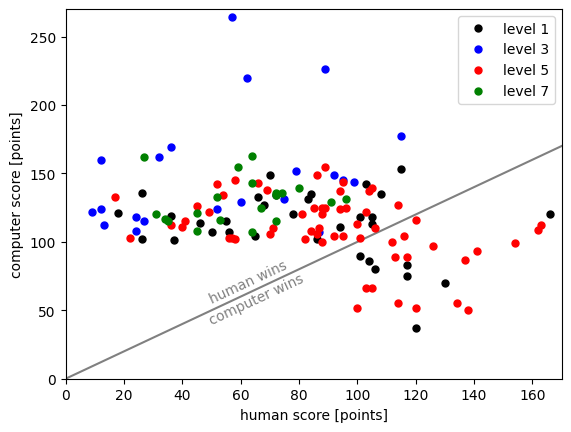

In [51]:
li=[0,300]
plt.plot(li,li,'-',ms=5,color='gray') 
plt.plot(resl1[1,:],resl1[2,:],'o',ms=5,color='black',label='level 1') 
plt.plot(resl3[1,:],resl3[2,:],'o',ms=5,color='blue',label='level 3') 
plt.plot(resl5[1,:],resl5[2,:],'o',ms=5,color='red',label='level 5') 
plt.plot(resl7[1,:],resl7[2,:],'o',ms=5,color='green',label='level 7') 
plt.text(50, 55, 'human wins', color='gray',rotation=25, rotation_mode='anchor')
plt.text(50, 40, 'computer wins', color='gray',rotation=25, rotation_mode='anchor')
plt.legend(loc="best")
plt.xscale("linear")
plt.xlim(0,170)
plt.ylim(0,270)
plt.xlabel("human score [points]")
plt.ylabel("computer score [points]")

Text(0, 0.5, 'computer-human score [points]')

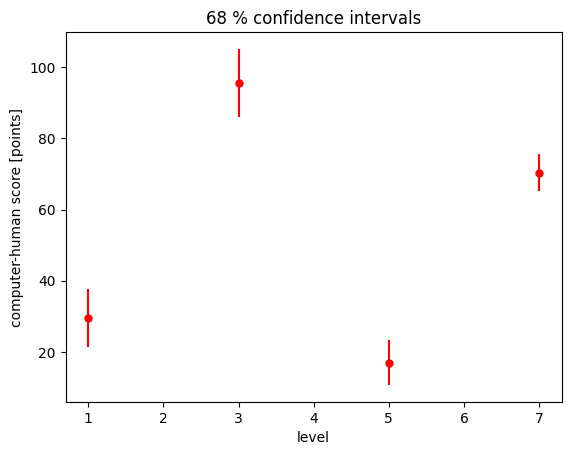

In [52]:
list_res=[resl1,resl3,resl5,resl7]
stat=np.zeros((6,len(list_res)))
for i in range(len(list_res)):
    stat[0,i]=list_res[i][6,0]
    stat[1,i]=np.mean(list_res[i][2,:]-list_res[i][1,:])
    stat[2,i]=np.std(list_res[i][2,:]-list_res[i][1,:])/np.sqrt(list_res[i].shape[1])
    stat[3,i]=np.mean(list_res[i][3]) 
    alpha=0.317
    k=int(np.sum(list_res[i][3]))
    n=list_res[i].shape[1]
    p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
    stat[4,i]=p_u
    stat[5,i]=p_o
    if np.isnan(stat[5,i]):
        stat[5,i]=1
lower_error =  stat[3]-stat[4,:]
upper_error =  stat[5,:]-stat[3]
asymmetric_error = np.array([lower_error,upper_error])
plt.errorbar(stat[0,:],stat[1,:], yerr=stat[2,:],ms=5, fmt='o',color='red')
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("computer-human score [points]")

Text(0, 0.5, '% human wins')

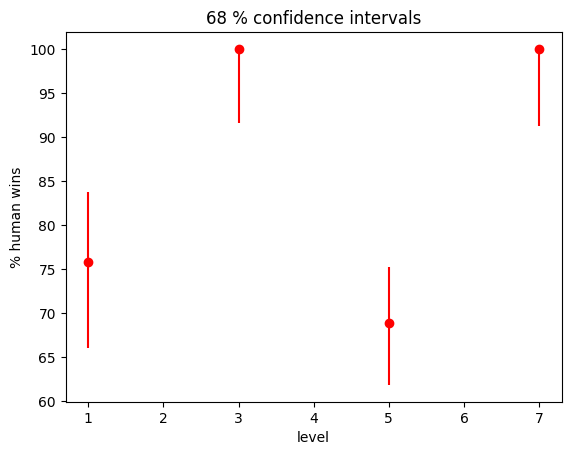

In [53]:
plt.errorbar(stat[0,:],100*stat[3,:], yerr=asymmetric_error*100, fmt='o', color = 'red')   
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("% human wins")

The computer in level 3 and 7 performs worse, the computer never wins there and the average points are also similar. The computer is better in level 1 and 5, it wins about 1/4, enough that the game makes fun. 
There is no improvement of level 5 to 1 visisble. There still could be a small improvement, the errorbars overlap. However it can only be so small that it is an interesting improvement, which would be equal changes for human and computer. 

Below I check how good the models are to predict points in the rounds against humans. 

In [54]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
level1_2players_modelb = XGBRegressor()
level1_2players_modelb.load_model("xgb_model3.json")
level1_2players_modelc = XGBRegressor()
level1_2players_modelc.load_model("xgb_model4.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 3565)
[[ 4.  5. -1. ...  7.  6. 11.]
 [20. -1. 20. ... 20. -1. 20.]
 [20. 20. 20. ... 20.  2. 20.]
 ...
 [30.  2. 30. ... 12. 11.  6.]
 [ 4.  0.  7. ...  4. 11.  4.]
 [ 5. -1.  8. ...  6. 20. 12.]]


In [55]:
res=level1_2players_model.predict(for_xgb.T)
resb=level1_2players_modelb.predict(for_xgb.T)

Text(0.5, 1.0, 'xgboost fitted to random acting computer')

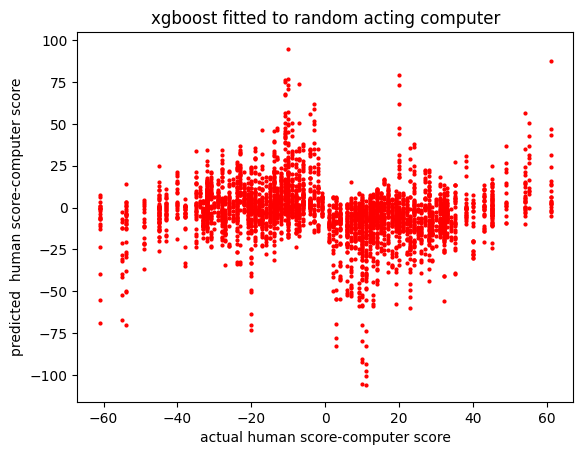

In [56]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to random acting computer")

Text(0.5, 1.0, 'xgboost fitted to improved acting computer')

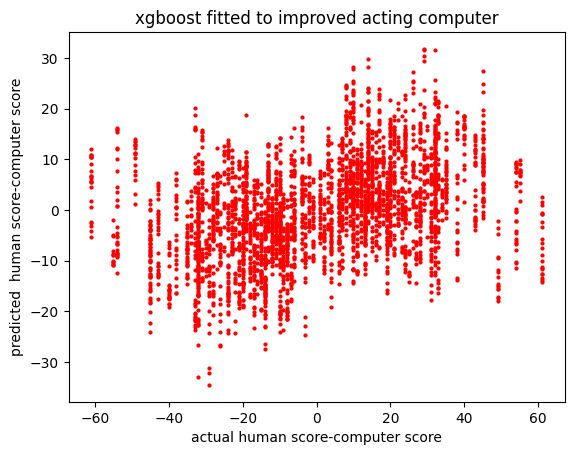

In [57]:
plt.plot( df.score_self-df.score_other,resb,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to improved acting computer")

The model fitted to the improbved acting computer looks clearly better, there is a positivecorrelation visible while there is nothing or a negative correlation visible for the other. 

In [58]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781


The prediction is rather bad for the xgboost model fitted to the random data, when subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduces slightly, thus just a few cases are really badly predicted. 

The similar xgbmodel fitted to improved computer actions fairs better, it reduces most measures of performances

Other ideas use both xgb (more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 

In [59]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)


In [60]:
#feature negering to better columns
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round_number']
df2=df.loc[:,newcolumns]
#excloding target columns and round
df3=df.loc[:,newcolumns[0:13]]

In [61]:
resc=level1_2players_modelc.predict(df3)

Text(0.5, 1.0, 'xgboost on feature engering fitted to improved acting computer')

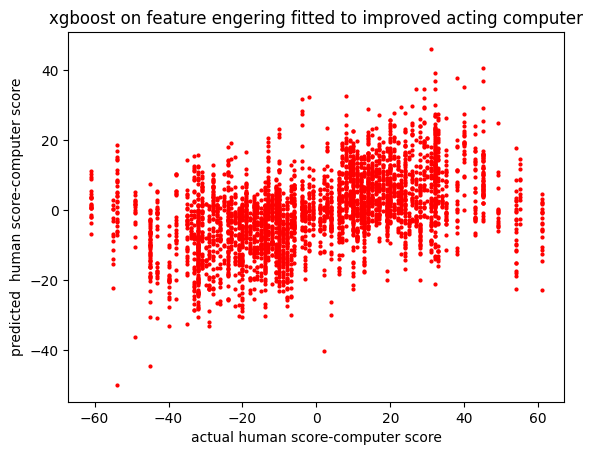

In [62]:
plt.plot( df.score_self-df.score_other,resc,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost on feature engering fitted to improved acting computer")

In [63]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")
print("Model 3")
print(f"standard deviation data-model {np.round(np.std(resc-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resc-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781
Model 3
standard deviation data-model 22.224
median deviation data 16.108


The two xgboost models based on the same data perform somewhat similar, the one using the data directly has a smaller median deviation, the other a smaller deviation deviation. 

In [64]:
feature_train2,feature_test2, target_train2,target_test2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.6)

2139
2148


In [65]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 0.1537 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 27.4042 points
standard deviation of prediction-train 5.689 points
[ 0.          6.          5.68904372 27.40418715]


In [66]:
loop_reg(feature_train2, target_train2, feature_test2, target_test2,4,1,1.414,25,"xgb_human1_maxd04.txt")

doing case 0
xgb took 0.1113 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.7528 points
standard deviation of prediction-train 13.7311 points
doing case 1
xgb took 0.0527 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.8047 points
standard deviation of prediction-train 13.9161 points
doing case 2
xgb took 0.0709 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 26.0911 points
standard deviation of prediction-train 13.7356 points
doing case 3
xgb took 0.0522 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.9185 points
standard deviation of prediction-train 13.9202 points
doing case 4
xgb took 0.0528 seconds
standard deviation of test 25.9178 points
s

In [67]:
hum1=np.loadtxt("xgb_human1_maxd01.txt")
hum2=np.loadtxt("xgb_human1_maxd02.txt")
hum3=np.loadtxt("xgb_human1_maxd03.txt")
hum4=np.loadtxt("xgb_human1_maxd04.txt")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum1[3]),4)} of max-depth=1")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum2[3]),4)} of max-depth=2")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum3[3]),4)} of max-depth=3")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum4[3]),4)} of max-depth=4")

minimum standard deviation of (prediction-test data) 23.4487 of max-depth=1
minimum standard deviation of (prediction-test data) 23.4124 of max-depth=2
minimum standard deviation of (prediction-test data) 23.5616 of max-depth=3
minimum standard deviation of (prediction-test data) 23.7237 of max-depth=4


Text(0, 0.5, 'standard deviation of data-prediction [points]')

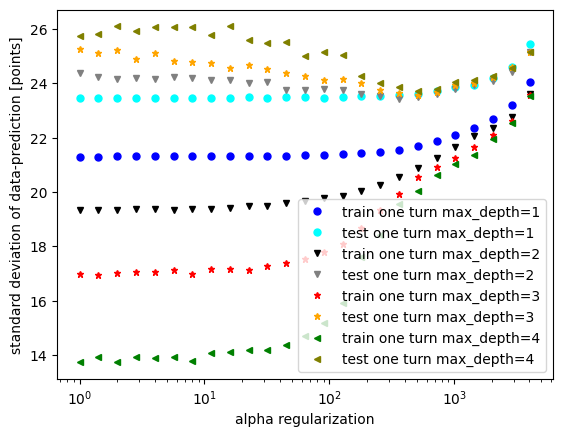

In [68]:
plt.plot(hum1[0],hum1[2],'o',ms=5,color='blue',label='train one turn max_depth=1') 
plt.plot(hum1[0],hum1[3],'o',ms=5,color='cyan',label='test one turn max_depth=1')
plt.plot(hum2[0],hum2[2],'v',ms=5,color='black',label='train one turn max_depth=2') 
plt.plot(hum2[0],hum2[3],'v',ms=5,color='gray',label='test one turn max_depth=2')
plt.plot(hum3[0],hum3[2],'*',ms=5,color='red',label='train one turn max_depth=3') 
plt.plot(hum3[0],hum3[3],'*',ms=5,color='orange',label='test one turn max_depth=3')
plt.plot(hum4[0],hum4[2],'<',ms=5,color='green',label='train one turn max_depth=4') 
plt.plot(hum4[0],hum4[3],'<',ms=5,color='olive',label='test one turn max_depth=4')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")

Taring an xgboost model on the human is worse in the prediction than both models trained on advanced computer settings. 

I could explore more complicated models but could also first implement the otehr xgbbosst, espeically the one
without feature engering needs just a different input file as name. 

In [69]:
#check how model in actual application fares
#linear regression on each action option separately?  a lot of work and seem not machine learning
print(df2)
dftake=df2[df2.action_take_open==1]

      open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0                4.0            10           2      8.0     13.0   
1                5.0            10           2      1.0      0.0   
2               -1.0            10           2      8.0     12.0   
3                8.0            10           2      2.0      3.0   
4                2.0            10           2      4.0      3.0   
...              ...           ...         ...      ...      ...   
3560            10.0             2          10     12.0     28.0   
3561            12.0             1          11      8.0     41.0   
3562             7.0             2          10      6.0     22.0   
3563             6.0             1           8      8.0     24.0   
3564            11.0             2          10     12.0     28.0   

      other_player_n_closed  other_player_n_open  other_player_max  \
0                        10                    2               1.0   
1                        10                

In [70]:
print(level1_2players_model.feature_importances_.shape,df.shape)
print(level1_2players_modelb.feature_importances_)

(30,) (3565, 60)
[0.20022598 0.00963422 0.11840304 0.00660788 0.01313902 0.0138765
 0.00815738 0.0077707  0.00912716 0.00465302 0.013208   0.03226249
 0.01348601 0.01038121 0.12892811 0.01242334 0.00744092 0.01283619
 0.00913652 0.00782426 0.0077482  0.00451147 0.01120893 0.02889716
 0.01112024 0.153542   0.00087686 0.00638651 0.12962395 0.00656274]


In [71]:
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')              
print(columns)
print(len(columns))

['open_pile_card', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card']
30


fitting random data
open_pile_card has importance 0.0117
action_take_open has importance 0.0658
discard_value has importance 0.0133
id_player_card has importance 0.0079
fitting level 1 data
open_pile_card has importance 0.2002
own_cards_1 has importance 0.1184
own_cards_10 has importance 0.0323
other_player_cards_1 has importance 0.1289
other_player_cards_10 has importance 0.0289
action_take_open has importance 0.1535
id_player_card has importance 0.1296


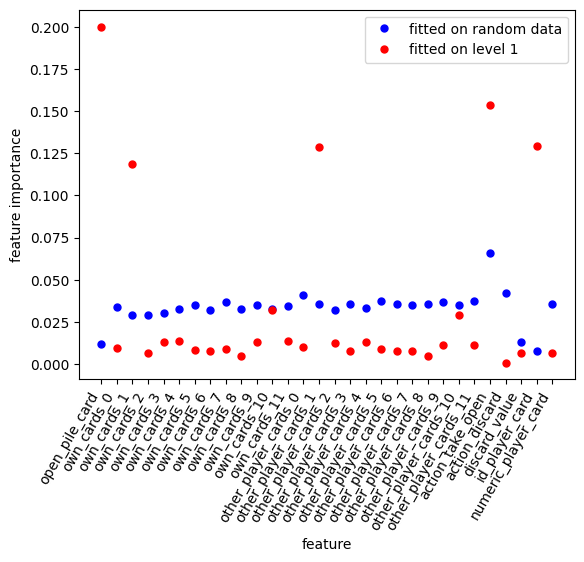

In [72]:
plt.plot(columns[0:30],level1_2players_model.feature_importances_,'o',ms=5,color='blue',label='fitted on random data') 
plt.plot(columns[0:30],level1_2players_modelb.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting random data")
for i in range(30):
    if abs(level1_2players_model.feature_importances_[i]-np.median(level1_2players_model.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_model.feature_importances_[i],4)))
 
print("fitting level 1 data")
for i in range(30):
    if abs(level1_2players_modelb.feature_importances_[i]-np.median(level1_2players_modelb.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_modelb.feature_importances_[i],4)))
    

In the first fit which is done on the random data the vast majority features has about the same importance. 
Less importance has the open card, the value of the discarded card and least the id of the choosen card. The only feature with larger importance is the whether the open card is used. 
That seems plausible, most are equally importance, the id is truly less imprortant usually and whether the open card has a lot of importance on the following actions.

In contrast a lot is different for the model fitted to level 1 (which has less depth and fits more correlated data), most have nearlz no importance. Take action stazs important but beides also not so plasuible also 4 player cards (that both player contribute the same can be understood since who is who changes from turn to turn) and the id of used card. That the value of the open is used is plausible, since it matters at least closer to the end of the game. 
Still overall it makes less sense, and thus it is not surprising that implementing it does not lead to improvements. 

fitting level 1 data with features
open_pile_card has importance 0.0178
own_n_closed has importance 0.2736
own_n_open has importance 0.0091
own_sum has importance 0.1182
other_player_n_closed has importance 0.2667
other_player_n_open has importance 0.0131
other_player_sum has importance 0.1163
action_take_open has importance 0.0199
action_discard has importance 0.0141
numeric_player_card has importance 0.0582


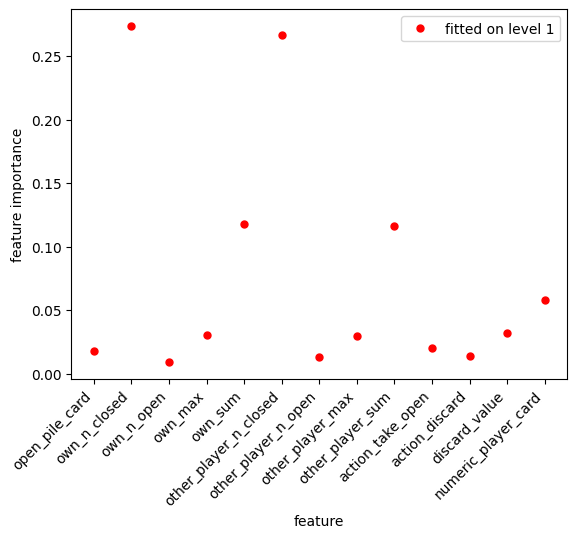

In [73]:
plt.plot(newcolumns[0:13],level1_2players_modelc.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting level 1 data with features")
for i in range(13):
    if abs(level1_2players_modelc.feature_importances_[i]-np.median(level1_2players_modelc.feature_importances_))>0.01:
        print(newcolumns[i]+" has importance "+str(round(level1_2players_modelc.feature_importances_[i],4)))
    

Here it looks more plausibel again. Most important are the sum of the card values and how many or open, since the the differential score is approximate: own_sum+own_n_closed*avg_value-(other_player_sum+other_player_n_closed*avg_value)

The next important is the player card given, which is the next important, because it always matters.

That n_open has the smallest importance makes sense since it is just reverse of closed always besides for vanishing cards, and it is not expected that those importance can be discovered here.  

Reason for no improvement could be that the system fits too much the past xgboost model which helps for predicting future
but possible not for winning. Using first level data which is more random in a better moredl could help agaoinst that. 


New Idea

Human imitation. Now predicting which card was used. First for all human actions. Later possible restricting to won games, could add other wins to it.

Both rounds and games are used. 

In [156]:
list_all=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer')) and os.path.isfile(os.path.join(myPath, f))]
#now sorting now randomness wanted 
random.shuffle(list_all)
print(list_all)
print(len(list_all))

['human_computer1_111.txt', 'human_computer3_g018.txt', 'human_computer3_014.txt', 'human_computer3_g001.txt', 'human_computer1_023.txt', 'human_computer5_g059.txt', 'human_computer1_g032.txt', 'human_computer5_g053.txt', 'human_computer3_g011.txt', 'human_computer3_008.txt', 'human_computer3_020.txt', 'human_computer5_g016.txt', 'human_computer5_g020.txt', 'human_computer1_073.txt', 'human_computer1_104.txt', 'human_computer5_g013.txt', 'human_computer5_g046.txt', 'human_computer5_g017.txt', 'human_computer3_003.txt', 'human_computer1_090.txt', 'human_computer1_074.txt', 'human_computer5_g054.txt', 'human_computer3_g002.txt', 'human_computer1_107.txt', 'human_computer1_065.txt', 'human_computer1_059.txt', 'human_computer5_g056.txt', 'human_computer1_012.txt', 'human_computer1_024.txt', 'human_computer7_g015.txt', 'human_computer3_g003.txt', 'human_computer1_098.txt', 'human_computer5_g008.txt', 'human_computer7_g006.txt', 'human_computer1_089.txt', 'human_computer5_g021.txt', 'human_c

In [157]:
#get all columns for now, add also win worker
#first get number of rows 
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])
    cc+=a.shape[1]
print(cc)  
all_hu_com=np.zeros((55,int(cc)))
#55 is number of data entry
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])    
    #rounds
    if a.shape[0]==51:
        all_hu_com[0:51,cc:cc+a.shape[1]]=a
        #rounds
        all_hu_com[51,cc:cc+a.shape[1]]=0
        #not fats but not big here
        for j in range(a.shape[1]):
            if a[49,j]<a[50,j]:
                all_hu_com[52,cc+j]=1
            else:
                all_hu_com[53,cc+j]=1
    else:            
         all_hu_com[0:54,cc:cc+a.shape[1]]=a   
    all_hu_com[54,cc:cc+a.shape[1]]=i        
    cc+=a.shape[1]     
    

19713


In [158]:
#column names 
columns2=['acting_player']
columns2.append('open_pile_card')
for i in range(15):
    columns2.append('number_of_'+str(i-2)+'_in_open')
columns2.append('number_of_cards_in_closed')
for i in range(12):
    columns2.append('own_cards_'+str(i))
for i in range(12):
    columns2.append('other_player_cards_'+str(i))    
columns2.append('action_take_open')
columns2.append('action_discard')
columns2.append('discard_value')
columns2.append('id_player_card')
columns2.append('numeric_player_card') 
columns2.append('vanish_marker')
columns2.append('turn')
columns2.append('score_self')
columns2.append('score_other')
columns2.append('round_number')
columns2.append('winner_self')
columns2.append('winner_other')
columns2.append('entry_number')
print(len(columns2),columns2)

55 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [159]:
df_hum_com = pd.DataFrame(data = all_hu_com.T, index=range(all_hu_com.shape[1]),columns = columns2)
print(df_hum_com.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             8.0                   0.0                   0.0   
1            1.0             8.0                   0.0                   0.0   
2            0.0            10.0                   0.0                   0.0   
3            1.0            -1.0                   0.0                   0.0   
4            0.0             8.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Select human, human who wins and all winners now.

In [160]:
#select human is first player
df_hum=df_hum_com[df_hum_com.acting_player==0]
df_hum_win=df_hum_com[(df_hum_com.acting_player==0) & (df_hum_com.winner_self==1)]
df_win=df_hum_com[ (df_hum_com.winner_self==1)]
print(df_hum.shape,df_hum_win.shape,df_win.shape)


(9672, 55) (7778, 55) (9736, 55)


Now I get some sumarizing columns for the player cards, since it is clear that for using single card information
there were not enough games. 

In [161]:
#get average value of cards
weight_vec=np.array([5/150,10/150,15/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150]) 
vals=np.array(range(-2,13))

av_value=np.dot(vals,weight_vec)
#average vale of card
print(f"average value is {av_value}")
df_hum['own_n_closed']=df_hum.loc[:,'own_cards_0':'own_cards_11'][df_hum.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df_hum['own_n_open']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum['own_sum']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum['own_max']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum['other_player_n_closed']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum['other_player_n_open']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum['other_player_sum']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum['other_player_max']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
#replace placeholder with for closed with avg_value
df_hum['value_player_card']=df_hum['numeric_player_card']
df_hum.value_player_card[df_hum.numeric_player_card==20]=av_value

#now same for human wins
df_hum_win['own_n_closed']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][df_hum_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_hum_win['own_n_open']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum_win['own_sum']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum_win['own_max']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum_win['other_player_n_closed']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum_win['other_player_n_open']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum_win['other_player_sum']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum_win['other_player_max']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_hum_win['value_player_card']=df_hum_win['numeric_player_card']
df_hum_win.value_player_card[df_hum_win.numeric_player_card==20]=av_value


#now same for wins
df_win['own_n_closed']=df_win.loc[:,'own_cards_0':'own_cards_11'][df_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_win['own_n_open']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_win['own_sum']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_win['own_max']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_win['other_player_n_closed']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_win['other_player_n_open']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_win['other_player_sum']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_win['other_player_max']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_win['value_player_card']=df_win['numeric_player_card']
df_win.value_player_card[df_win.numeric_player_card==20]=av_value

average value is 5.066666666666666


Now I am looking on correlations. 

In [162]:
#s1 corr(s2, method='pearson')
corrs=df_hum.corr('pearson')
#now only wins 
corrs_hum_win=df_hum_win.corr('pearson')
corrs_win=df_win.corr('pearson')

open_pile_card
 human  has correlation of -0.7253
 human wins has correlation of -0.7345
 wins has correlation of -0.7366
own_cards_0
 human  has correlation of 0.0966
 human wins has correlation of 0.1039
 wins has correlation of 0.0885
action_discard
 human  has correlation of -0.4904
 human wins has correlation of -0.4912
 wins has correlation of -0.451
discard_value
 human  has correlation of 0.9559
 human wins has correlation of 0.9571
 wins has correlation of 0.9537
numeric_player_card
 human  has correlation of -0.1682
 human wins has correlation of -0.1585
 wins has correlation of -0.1397
vanish_marker
 human  has correlation of 0.1098
 human wins has correlation of 0.1066
 wins has correlation of 0.1024
score_self
 human  has correlation of -0.0666
 human wins has correlation of -0.0448
 wins has correlation of -0.1032
other_player_sum
 human  has correlation of -0.0169
 human wins has correlation of -0.0779
 wins has correlation of -0.1178
other_player_max
 human  has correla

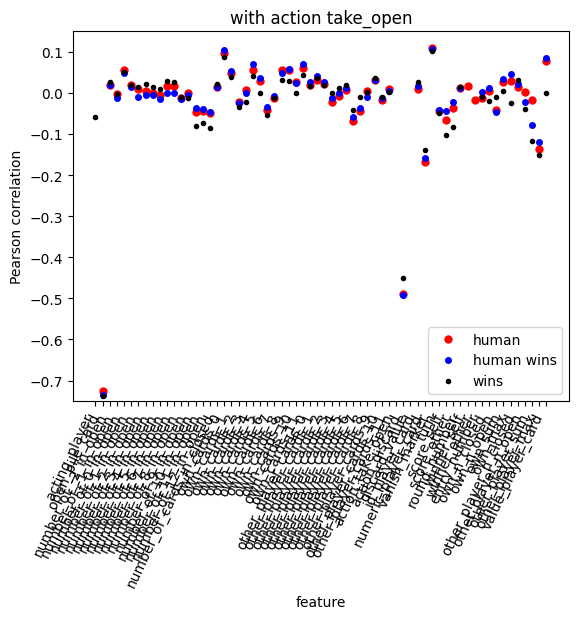

In [163]:
plt.plot(df_hum.columns,corrs.action_take_open,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.action_take_open,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.action_take_open,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.75,0.15)
plt.xticks(rotation=65, ha='right')
plt.title("with action take_open")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.action_take_open[i]<1 and  (abs(corrs.action_take_open[i])>0.10 or abs(corrs_hum_win.action_take_open[i])>0.10 or  abs(corrs_win.action_take_open[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.action_take_open[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.action_take_open[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.action_take_open[i],4)}")     

Some of the action happen only after take_action is decided like discard, x_player_card, score_x thus they should be ignored. Also vanish_marker cannot be just used because it happens only after it. However, the possibility of it could (and likely should be when just one exchange is missing) be predicted.

The strongest correlation is with the open card value as expected. All others are clearly less important, the next important is other_player_max

open_pile_card
 human  has correlation of 0.3546
 human wins has correlation of 0.3555
 wins has correlation of 0.317
action_take_open
 human  has correlation of -0.4904
 human wins has correlation of -0.4912
 wins has correlation of -0.451
discard_value
 human  has correlation of -0.2858
 human wins has correlation of -0.2839
 wins has correlation of -0.2612
numeric_player_card
 human  has correlation of 0.4786
 human wins has correlation of 0.4604
 wins has correlation of 0.4994
vanish_marker
 human  has correlation of -0.1343
 human wins has correlation of -0.1379
 wins has correlation of -0.1154
score_self
 human  has correlation of 0.1274
 human wins has correlation of 0.1161
 wins has correlation of 0.0674
own_max
 human  has correlation of -0.0983
 human wins has correlation of -0.1082
 wins has correlation of -0.1265
other_player_max
 human  has correlation of 0.1069
 human wins has correlation of 0.0898
 wins has correlation of 0.0746
value_player_card
 human  has correlation 

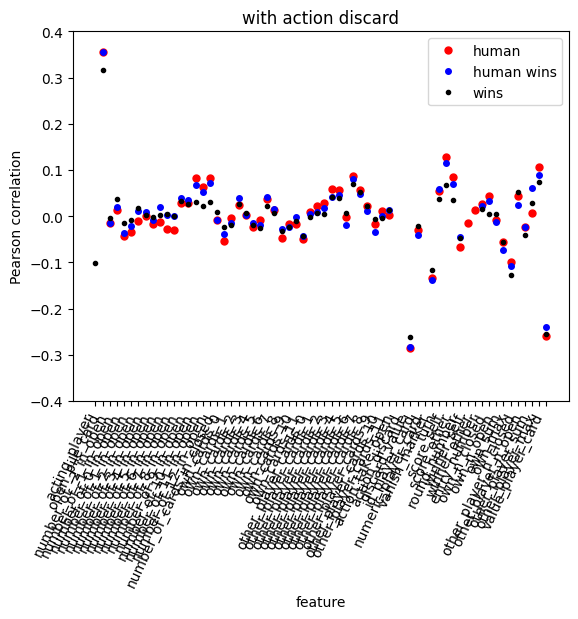

In [164]:
plt.plot(df_hum.columns,corrs.action_discard,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.action_discard,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.action_discard,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.4,0.4)
plt.xticks(rotation=65, ha='right')
plt.title("with action discard")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.action_discard[i]<1 and  (abs(corrs.action_discard[i])>0.10 or abs(corrs_hum_win.action_discard[i])>0.10 or  abs(corrs_win.action_discard[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.action_discard[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.action_discard[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.action_discard[i],4)}")     

The strongest corelation action_take_open is logically predictable connected and the x_player card is happening afterwards in a turn. Thus again open pile_card has the strongest correlation, but that is an artifact because turns which use take_open have automatically action_discard of zero. 

Still, that is not a large problem for xgboost since that automatically separates the three there. 
After that as expected dicard value has the strongest correlation since it depends from that value which action is the best. 

Below then the corrleation with played card. In two variants, first closed card are 20, then they are 5.07 which they are in average. 

number_of_3_in_open
 human  has correlation of -0.0872
 human wins has correlation of -0.0703
 wins has correlation of -0.1032
number_of_4_in_open
 human  has correlation of -0.0941
 human wins has correlation of -0.0865
 wins has correlation of -0.1145
number_of_10_in_open
 human  has correlation of 0.0725
 human wins has correlation of 0.0421
 wins has correlation of 0.1417
number_of_11_in_open
 human  has correlation of 0.0751
 human wins has correlation of 0.045
 wins has correlation of 0.1319
number_of_12_in_open
 human  has correlation of 0.0721
 human wins has correlation of 0.0402
 wins has correlation of 0.1375
action_discard
 human  has correlation of -0.2581
 human wins has correlation of -0.2398
 wins has correlation of -0.2538
numeric_player_card
 human  has correlation of -0.231
 human wins has correlation of -0.2135
 wins has correlation of -0.1836
vanish_marker
 human  has correlation of -0.2094
 human wins has correlation of -0.2146
 wins has correlation of -0.1895
sco

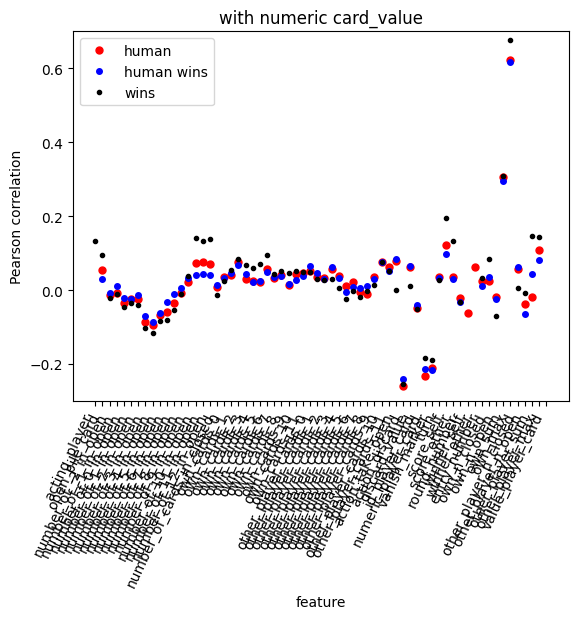

In [165]:
plt.plot(df_hum.columns,corrs.value_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.value_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.value_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.7)
plt.xticks(rotation=65, ha='right')
plt.title("with numeric card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.value_player_card[i]<1 and  (abs(corrs.value_player_card[i])>0.10 or abs(corrs_hum_win.value_player_card[i])>0.10 or  abs(corrs_win.value_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.value_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.value_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.value_player_card[i],4)}")   

number_of_12_in_open
 human  has correlation of -0.0797
 human wins has correlation of -0.0821
 wins has correlation of -0.1072
own_cards_0
 human  has correlation of 0.0809
 human wins has correlation of 0.1076
 wins has correlation of 0.0815
own_cards_8
 human  has correlation of 0.1002
 human wins has correlation of 0.127
 wins has correlation of 0.0782
own_cards_11
 human  has correlation of 0.1008
 human wins has correlation of 0.112
 wins has correlation of 0.0722
action_take_open
 human  has correlation of -0.1682
 human wins has correlation of -0.1585
 wins has correlation of -0.1397
action_discard
 human  has correlation of 0.4786
 human wins has correlation of 0.4604
 wins has correlation of 0.4994
vanish_marker
 human  has correlation of -0.2178
 human wins has correlation of -0.2313
 wins has correlation of -0.1721
turn
 human  has correlation of -0.105
 human wins has correlation of -0.0994
 wins has correlation of -0.106
own_n_closed
 human  has correlation of 0.1346
 hum

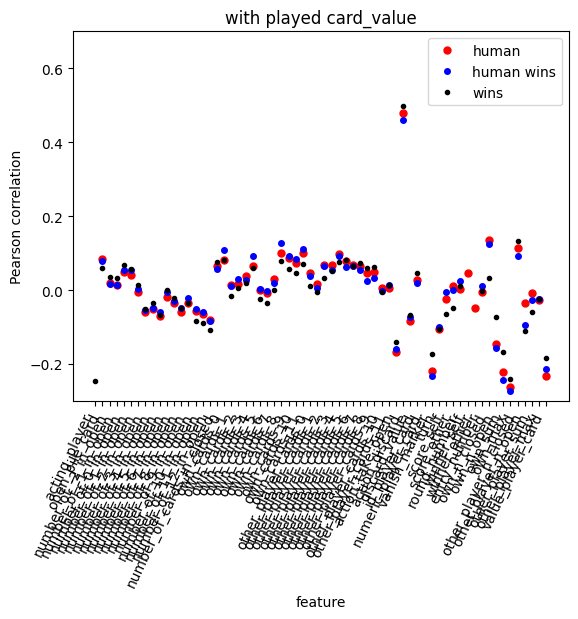

In [166]:
plt.plot(df_hum.columns,corrs.numeric_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.numeric_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.numeric_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.7)
plt.xticks(rotation=65, ha='right')
plt.title("with played card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.numeric_player_card[i]<1 and  (abs(corrs.numeric_player_card[i])>0.10 or abs(corrs_hum_win.numeric_player_card[i])>0.10 or  abs(corrs_win.numeric_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.numeric_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.numeric_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.numeric_player_card[i],4)}")  

Both are similar, likely value is better, since there are at most very small effects when the card is closed when taking it. 

Again the most connectedness ones the action parts before and some not knowable, but the player card summarizing
numbers are also more important now. 

Selecting some features which matter more likely for trying xgboost first for take_open.

In [167]:
print(df_hum.columns)
col_sel1=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','entry_number']
df_hum_sel=df_hum.loc[:,col_sel1]
df_hum_win_sel=df_hum_win.loc[:,col_sel1]
df_win_sel=df_win.loc[:,col_sel1]

Index(['acting_player', 'open_pile_card', 'number_of_-2_in_open',
       'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open',
       'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open',
       'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open',
       'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open',
       'number_of_11_in_open', 'number_of_12_in_open',
       'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1',
       'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5',
       'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9',
       'own_cards_10', 'own_cards_11', 'other_player_cards_0',
       'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3',
       'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6',
       'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9',
       'other_player_cards_10', 'other_player_cards_11', 'action_take_ope

In [185]:
#now splitting
df_hum_train,df_hum_test= train_test_split(df_hum_sel,train_size=0.60, shuffle=True, random_state=1)
df_hum_win_train,df_hum_win_test= train_test_split(df_hum_win_sel,train_size=0.60, shuffle=True, random_state=1)
df_win_train,df_win_test= train_test_split(df_win_sel,train_size=0.60, shuffle=True, random_state=1)
print(df_hum_win_train.shape)
df_win_feature_train2,df_win_feature_test2,df_win_target_train2,df_win_target_test2=split_test(df_win_sel.iloc[:,0:9],df_win_sel.iloc[:,9], df_win_sel.iloc[:,10],0.6)
df_hum_feature_train2,df_hum_feature_test2,df_hum_target_train2,df_hum_target_test2=split_test(df_hum_sel.iloc[:,0:9],df_hum_sel.iloc[:,9], df_hum_sel.iloc[:,10],0.6)
df_hum_win_feature_train2,df_hum_win_feature_test2,df_hum_win_target_train2,df_hum_win_target_test2=split_test(df_hum_win_sel.iloc[:,0:9],df_hum_win_sel.iloc[:,9], df_hum_win_sel.iloc[:,10],0.6)

(4666, 11)
5842
5845
5803
5837
4667
4694


[[3875   29]
 [  55 1844]]


(<AxesSubplot:title={'center':'train'}>, Text(0.5, 1.0, 'train'))

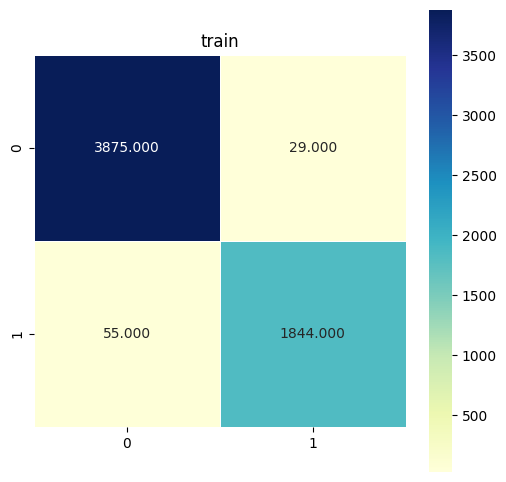

In [169]:

open1=XGBClassifier().fit(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9])
pred_te=open1.predict(df_hum_test.iloc[:,0:9])
pred_tr=open1.predict(df_hum_train.iloc[:,0:9])
conf_train = confusion_matrix(df_hum_train.iloc[:,9], pred_tr)
conf_test = confusion_matrix(df_hum_test.iloc[:,9], pred_te)
print(conf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("train")

[[2471  112]
 [ 176 1110]]


(<AxesSubplot:title={'center':'test'}>, Text(0.5, 1.0, 'test'))

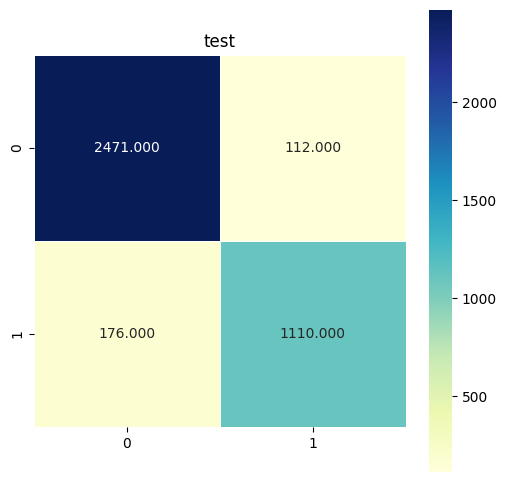

In [170]:
print(conf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("test")

In [171]:
#return fraction of wrong predicted
def perwrong(conf_matrix):
    return 1-(np.sum(conf_matrix)-conf_matrix[0,1]-conf_matrix[1,0])/np.sum(conf_matrix)

In [172]:
#percentage wrong as measure
train_wrong=perwrong(conf_train)
print(train_wrong)
test_wrong=perwrong(conf_test)
print(test_wrong)

0.014475271411338975
0.0744378392349444


There is some overfitting, but it is relevant improvemnt, but need to look on confusion matrix.

Testing do_xgb_class

In [173]:
ar=do_xgb_class(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9],df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],max_depth=5,reg=10)
print(ar)

xgb took 0.1277 seconds
percentage wrong test 8.17
percentage wrong train 7.08 
[10.          5.          0.07082544  0.08167485]


In [174]:
loop_reg(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9], df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],5,0.1,1.414,20,'take_open_human_xgb_depth5.txt',False)

doing case 0
xgb took 0.1922 seconds
percentage wrong test 7.52
percentage wrong train 2.58 
doing case 1
xgb took 0.1727 seconds
percentage wrong test 7.39
percentage wrong train 2.76 
doing case 2
xgb took 0.1232 seconds
percentage wrong test 7.24
percentage wrong train 2.41 
doing case 3
xgb took 0.1118 seconds
percentage wrong test 7.31
percentage wrong train 2.4 
doing case 4
xgb took 0.1213 seconds
percentage wrong test 7.19
percentage wrong train 2.64 
doing case 5
xgb took 0.1103 seconds
percentage wrong test 7.19
percentage wrong train 2.38 
doing case 6
xgb took 0.1261 seconds
percentage wrong test 7.31
percentage wrong train 2.58 
doing case 7
xgb took 0.1361 seconds
percentage wrong test 7.29
percentage wrong train 2.58 
doing case 8
xgb took 0.1258 seconds
percentage wrong test 7.52
percentage wrong train 3.07 
doing case 9
xgb took 0.1085 seconds
percentage wrong test 7.44
percentage wrong train 3.41 
doing case 10
xgb took 0.1143 seconds
percentage wrong test 7.73
percen

Text(0, 0.5, '% wrong')

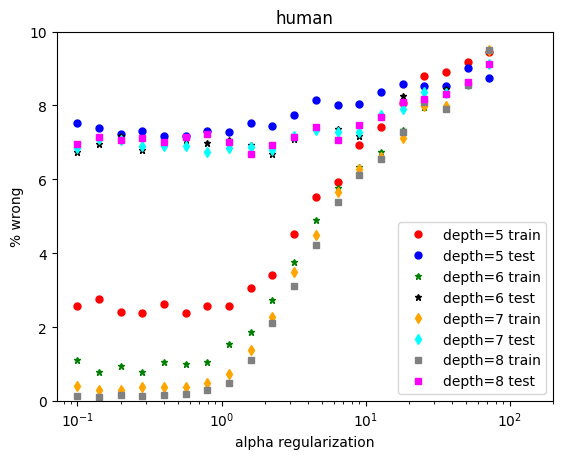

In [175]:
take5=np.loadtxt('take_open_human_xgb_depth5.txt')
take6=np.loadtxt('take_open_human_xgb_depth6.txt')
take7=np.loadtxt('take_open_human_xgb_depth7.txt')
take8=np.loadtxt('take_open_human_xgb_depth8.txt')
plt.plot(take5[0,:],100*take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5[0,:],100*take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6[0,:],100*take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6[0,:],100*take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7[0,:],100*take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7[0,:],100*take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8[0,:],100*take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8[0,:],100*take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

The differences in test seem to be very small, besides that beyound some regularization it gets worse. Not clear what is bets, should also look into logistic.

Now looking on games being only in training or test or in both.

In [189]:
#now separating test and train by separate games 
loop_reg(df_hum_feature_train2,df_hum_target_train2,df_hum_feature_test2,df_hum_target_test2,5,0.1,1.414,30,'take_open_hum2_xgb_depth5.txt',False)

doing case 0
xgb took 0.1631 seconds
percentage wrong test 6.39
percentage wrong train 2.26 
doing case 1
xgb took 0.148 seconds
percentage wrong test 6.6
percentage wrong train 2.5 
doing case 2
xgb took 0.1239 seconds
percentage wrong test 6.88
percentage wrong train 2.42 
doing case 3
xgb took 0.1598 seconds
percentage wrong test 6.44
percentage wrong train 2.36 
doing case 4
xgb took 0.1289 seconds
percentage wrong test 6.39
percentage wrong train 2.35 
doing case 5
xgb took 0.1422 seconds
percentage wrong test 6.78
percentage wrong train 2.55 
doing case 6
xgb took 0.131 seconds
percentage wrong test 6.75
percentage wrong train 2.45 
doing case 7
xgb took 0.1889 seconds
percentage wrong test 6.54
percentage wrong train 2.66 
doing case 8
xgb took 0.1322 seconds
percentage wrong test 6.73
percentage wrong train 2.81 
doing case 9
xgb took 0.1428 seconds
percentage wrong test 6.54
percentage wrong train 3.51 
doing case 10
xgb took 0.1564 seconds
percentage wrong test 7.12
percentag

Text(0, 0.5, '% wrong')

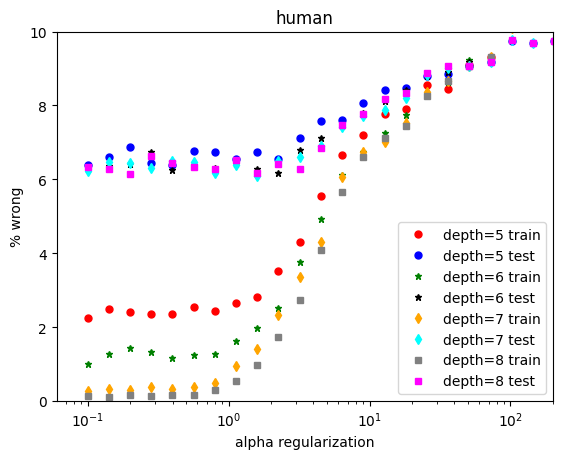

In [190]:
take5b=np.loadtxt('take_open_hum2_xgb_depth5.txt')
take6b=np.loadtxt('take_open_hum2_xgb_depth6.txt')
take7b=np.loadtxt('take_open_hum2_xgb_depth7.txt')
take8b=np.loadtxt('take_open_hum2_xgb_depth8.txt')
plt.plot(take5b[0,:],100*take5b[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5b[0,:],100*take5b[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6b[0,:],100*take6b[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6b[0,:],100*take6b[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7b[0,:],100*take7b[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7b[0,:],100*take7b[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8b[0,:],100*take8b[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8b[0,:],100*take8b[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Some change similar as for win below, still no clear minimum, still less free paramter should be betetr in general but I should add logistic also since that is easier to extrapolate outside the tested area. 


Now looking on winning.

In [176]:
loop_reg(df_win_train.iloc[:,0:9],df_win_train.iloc[:,9], df_win_test.iloc[:,0:9],df_win_test.iloc[:,9],8,0.1,1.414,20,'take_open_win_xgb_depth8.txt',False)

doing case 0
xgb took 0.3089 seconds
percentage wrong test 8.06
percentage wrong train 0.03 
doing case 1
xgb took 0.2364 seconds
percentage wrong test 7.8
percentage wrong train 0.03 
doing case 2
xgb took 0.2378 seconds
percentage wrong test 7.75
percentage wrong train 0.03 
doing case 3
xgb took 0.2598 seconds
percentage wrong test 8.16
percentage wrong train 0.03 
doing case 4
xgb took 0.3488 seconds
percentage wrong test 7.7
percentage wrong train 0.03 
doing case 5
xgb took 0.2414 seconds
percentage wrong test 7.68
percentage wrong train 0.05 
doing case 6
xgb took 0.2626 seconds
percentage wrong test 7.88
percentage wrong train 0.12 
doing case 7
xgb took 0.2456 seconds
percentage wrong test 7.75
percentage wrong train 0.31 
doing case 8
xgb took 0.3026 seconds
percentage wrong test 8.04
percentage wrong train 0.72 
doing case 9
xgb took 0.2739 seconds
percentage wrong test 7.57
percentage wrong train 1.49 
doing case 10
xgb took 0.2096 seconds
percentage wrong test 7.96
percent

In [194]:

#now separating test and train by separate games 
loop_reg(df_win_feature_train2,df_win_target_train2, df_win_feature_test2,df_win_target_test2,5,0.1,1.414,30,'take_open_win2_xgb_depth5.txt',False)

doing case 0
xgb took 0.1591 seconds
percentage wrong test 6.55
percentage wrong train 2.93 
doing case 1
xgb took 0.1389 seconds
percentage wrong test 6.43
percentage wrong train 3.1 
doing case 2
xgb took 0.1247 seconds
percentage wrong test 6.25
percentage wrong train 3.08 
doing case 3
xgb took 0.1426 seconds
percentage wrong test 6.58
percentage wrong train 2.72 
doing case 4
xgb took 0.1263 seconds
percentage wrong test 6.73
percentage wrong train 2.99 
doing case 5
xgb took 0.1869 seconds
percentage wrong test 6.01
percentage wrong train 2.89 
doing case 6
xgb took 0.1634 seconds
percentage wrong test 6.66
percentage wrong train 3.42 
doing case 7
xgb took 0.1298 seconds
percentage wrong test 6.48
percentage wrong train 3.03 
doing case 8
xgb took 0.1417 seconds
percentage wrong test 6.58
percentage wrong train 3.66 
doing case 9
xgb took 0.1427 seconds
percentage wrong test 6.66
percentage wrong train 4.16 
doing case 10
xgb took 0.1417 seconds
percentage wrong test 7.07
percen

Clearly different bevahiour, test is worse than before at least for small reguluarization. Is likely too extreme to use it since the samplies in it are not randomly ordered (Different computer strategy and also human strategies change likely). I just scramble them in the list. 

Text(0, 0.5, '% wrong')

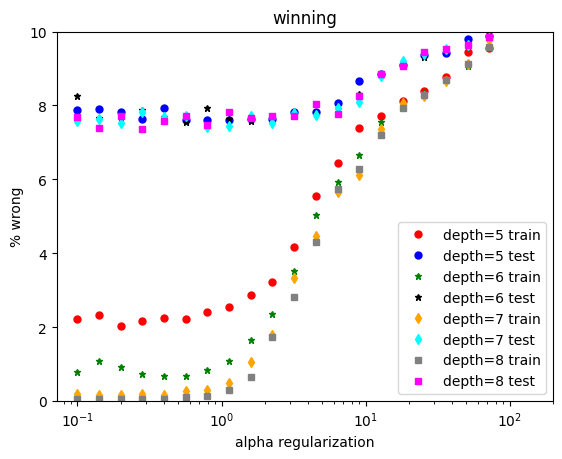

In [135]:
wtake5=np.loadtxt('take_open_win_xgb_depth5.txt')
wtake6=np.loadtxt('take_open_win_xgb_depth6.txt')
wtake7=np.loadtxt('take_open_win_xgb_depth7.txt')
wtake8=np.loadtxt('take_open_win_xgb_depth8.txt')
plt.plot(wtake5[0,:],100*wtake5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wtake5[0,:],100*wtake5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wtake6[0,:],100*wtake6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wtake6[0,:],100*wtake6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wtake7[0,:],100*wtake7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wtake7[0,:],100*wtake7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wtake8[0,:],100*wtake8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wtake8[0,:],100*wtake8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Here at least variance seems to get smaller around a regularziation of 2 maybe indicating that this is the best one. 
In gneral it is likely that the sample is too small to be very reliable, also likely the different data sets are likely too much correlated due to sharing states. 

Text(0, 0.5, '% wrong')

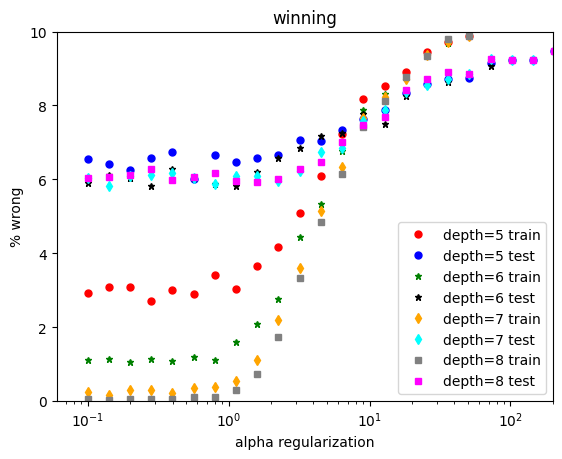

In [195]:
w2take5=np.loadtxt('take_open_win2_xgb_depth5.txt')
w2take6=np.loadtxt('take_open_win2_xgb_depth6.txt')
w2take7=np.loadtxt('take_open_win2_xgb_depth7.txt')
w2take8=np.loadtxt('take_open_win2_xgb_depth8.txt')
plt.plot(w2take5[0,:],100*w2take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(w2take5[0,:],100*w2take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(w2take6[0,:],100*w2take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(w2take6[0,:],100*w2take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(w2take7[0,:],100*w2take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(w2take7[0,:],100*w2take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(w2take8[0,:],100*w2take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(w2take8[0,:],100*w2take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Now bigger differences at least depth 5 looks worse now and also depth 6 needs smaller regularization.

Since the scatter is partly random, a single dip is likely that and should be ignored. 
There is still no clear minimum. 

In [54]:
res=df_hum.groupby(df_hum.open_pile_card).mean()

In [55]:
print(res)

                acting_player  number_of_-2_in_open  number_of_-1_in_open  \
open_pile_card                                                              
-2.0                      0.0              0.057143              0.114286   
-1.0                      0.0              0.031496              0.062992   
 0.0                      0.0              0.074380              0.119835   
 1.0                      0.0              0.037815              0.084034   
 2.0                      0.0              0.044510              0.109792   
 3.0                      0.0              0.045024              0.101896   
 4.0                      0.0              0.052459              0.122951   
 5.0                      0.0              0.037196              0.125894   
 6.0                      0.0              0.048387              0.129032   
 7.0                      0.0              0.032297              0.141148   
 8.0                      0.0              0.043735              0.140662   

In [118]:
list_f=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_f.sort()
games_stat=np.zeros((4,len(list_f)))
for i in range(len(list_f)):
    print(i)
    a=np.loadtxt(list_f[i])
    print(np.mean(a[1,:]))
    df2=pd.DataFrame(data = a.T, index=range(a.shape[1]),columns = columns2)
    games_stat[0,i]=i
    games_stat[1,i]=np.mean(a[1,:])
    games_stat[2,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].mean()
    games_stat[3,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].std()/np.sqrt(df2.iloc[:,44][(df2.iloc[:,44]!=30)].sum())
    print(games_stat[2,i])
#46 to  50 one run of game with more global variables  
#and 51 to 53

0
6.130434782608695
4.2875
1
6.63013698630137
4.666666666666667
2
6.15
4.706896551724138
3
7.976470588235294
7.861538461538461
4
6.885416666666667
4.552238805970149
5
7.571428571428571
7.5055555555555555
6
8.875
8.91764705882353
7
6.611111111111111
4.956521739130435
8
7.876712328767123
7.649122807017544
9
6.657534246575342
4.790697674418604
10
6.260273972602739
4.948717948717949
11
6.753968253968254
5.232876712328767
12
7.01010101010101
5.734375
13
6.040404040404041
4.333333333333333
14
7.261363636363637
5.446153846153846
15
8.232558139534884
8.285714285714286
16
6.077669902912621
5.206896551724138
17
6.972222222222222
5.185714285714286
18
8.378947368421052
7.733333333333333
19
8.309734513274336
8.568181818181818
20
8.065573770491802
8.644444444444444
21
8.785714285714286
8.423728813559322
22
6.65934065934066
4.966666666666667
23
6.726190476190476
5.0
24
6.2745098039215685
4.3
25
6.598639455782313
4.963636363636364
26
8.292307692307693
6.964285714285714
27
8.722222222222221
7.908163265

In [107]:
print(columns2)
print(a.shape)

['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker', 

discard_value


Text(0, 0.5, 'points')

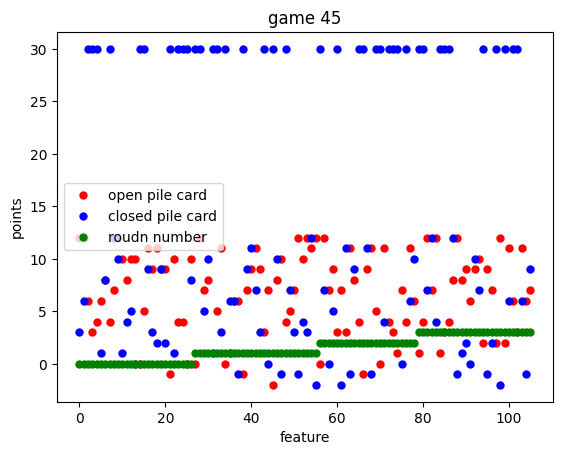

In [108]:
print(columns2[44])
plt.plot(range(106),a[1,:],'o',ms=5,color='red',label='open pile card') 
plt.plot(range(106),a[44,:],'o',ms=5,color='blue',label='closed pile card') 
plt.plot(range(106),a[51,:],'o',ms=5,color='green',label='roudn number') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("game 45")
plt.xlabel("feature")
plt.ylabel("points")

Seem to that create has some problem in games for sure, likely also rounds. 

Text(0, 0.5, 'points')

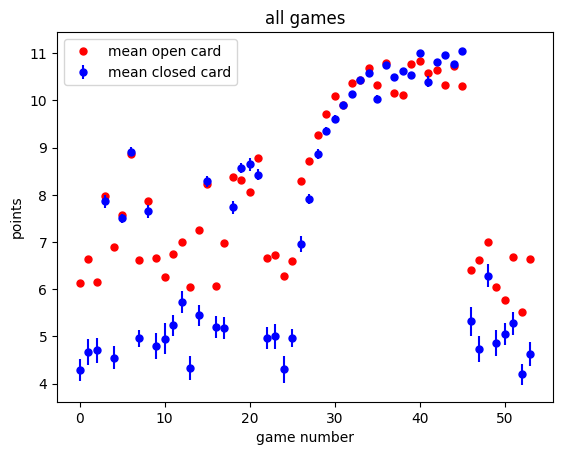

In [120]:
plt.plot(games_stat[0,:],games_stat[1,:],'o',ms=5,color='red',label='mean open card') 
plt.errorbar(games_stat[0,:],games_stat[2,:], yerr=games_stat[3,:],ms=5, fmt='o',color='blue',label='mean closed card')
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("all games")
plt.xlabel("game number")
plt.ylabel("points")

Forgotten global caused the piles to worsen. Looks now good. Closed should better be better than open because open gets the too bad cards of closed and deck. Average shoudl be 5.07 in closed deviation from it is likely just random. 

In [99]:
pile_closed=Pile('create_closed',False)
print(pile_closed)

Pile has length of 150 Cards and is closed. Its position is at [20, 10]


Text(0, 0.5, 'points')

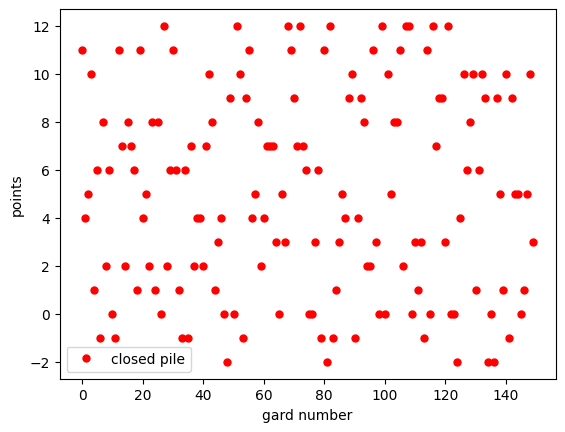

In [105]:
res=np.zeros((2,150))
for i in range(150):
    res[0,i]=i
    res[1,i]=pile_closed.list_cards[i].number
plt.plot(res[0,:],res[1,:],'o',ms=5,color='red',label='closed pile') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("")
plt.xlabel("card number")
plt.ylabel("points")

In [121]:
print(a[44,:])

[ 3.  6. 30. 30. 30.  1.  8. 30. 12. 10.  1.  4.  5.  0. 30. 30.  9.  3.
  2.  9.  2. 30.  1. 30. 30. 30.  8. 30. 30.  5. 10. 30. 30.  3. 30.  6.
  6. -1. 30.  9. 11.  7.  3. 30.  0. 30. 10. -1. 30.  7.  3. -1.  4.  3.
 12. -2. 30.  7.  0.  5. 30. -2. 11. -1.  9. 30. 30. 11. -1. 30. 30.  4.
 30. 30. 30.  0. 30.  6. 10. 30. 30.  7. 12.  4. 30. 30. 30. 12. -1.  1.
  2.  0. 10.  7. 30. -1.  2. 30. -2. 30.  6. 30. 30.  6. -1.  9.]
